# Customer Retention

### E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.


Note : Data Scientists have to apply their analytical skills to give findings and conclusions in detailed data analysis written

In [70]:
#Importing Required Libraries

import re #REGULAR EXPRESSION
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

## Framing the Problem


Five major factors that contributed to the success of an e-commerce store have been identified as: </br>**service quality, system quality, information quality, trust and net benefit**.</br></br> The research furthermore investigated the factors that influence the online customers repeat purchase intention.</br> The combination of both **utilitarian value** and **hedonistic values** are needed to affect the repeat purchase intention (loyalty) positively.</br> The data is collected from the Indian online shoppers.</br> Results indicate the e-retail success factors, which are very much **critical for customer satisfaction**. </br>Be careful: There are two sheets (one is detailed) and second is encoded in the excel file. </br>You may use any of them by extracting in separate excel sheet. The number of column(s) is more than 47. Read the column header carefully. </br>Note : Data Scientists have to apply their analytical skills to give findings and conclusions in detailed data analysis written in jupyter notebook . Only data analysis is required.

In [12]:
#Accessing the sheets from excel file

questionare = pd.read_excel(r'customer_retention_20220404.xlsx',engine='openpyxl', sheet_name = 2)
code_table = pd.read_excel(r'customer_retention_20220404.xlsx',engine='openpyxl', sheet_name = 6)
data = pd.read_excel(r'customer_retention_20220404.xlsx',engine='openpyxl', sheet_name = 'codedsheet')
data.columns = data.columns.str.rstrip()

data_sheet = pd.read_excel(r'customer_retention_20220404.xlsx',engine='openpyxl', sheet_name = 0)
data_sheet.columns = data_sheet.columns.str.rstrip()

**We have 269 peoples data**

In [13]:
data.shape

(269, 71)

In [59]:
questionare['Question'] = questionare.Question.str.rstrip()
questionare.loc[questionare['Code'] == 'UB']

new_questionaire = pd.read_excel(r'customer_retention_20220404.xlsx',engine='openpyxl', sheet_name = 5)
new_questionaire.Questions = new_questionaire.Questions.str.rstrip()
new_questionaire

,Questions,Code
0,1Gender of respondent,other
1,2 How old are you?,other
2,3 Which city do you shop online from?,other
3,4 What is the Pin Code of where you shop onlin...,other
4,5 Since How Long You are Shopping Online ?,other
...,...,...
65,"Longer page loading time (promotion, sales per...",issue
66,Limited mode of payment on most products (prom...,issue
67,Longer delivery period,issue
68,Change in website/Application design,issue


Data shows the most recommended e-commerce store is AMAZON

Amazon.in       45.911950
Flipkart.com    26.624738
Myntra.com      15.932914
Paytm.com        9.224319
snapdeal.com     2.306080
dtype: float64


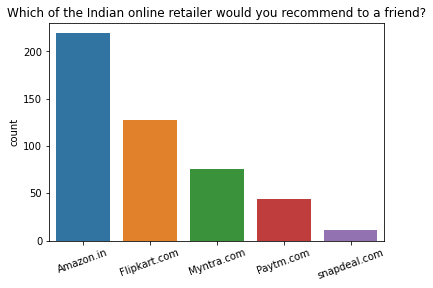

In [60]:
DM_df = pd.DataFrame({})

for i in [data for data in new_questionaire[new_questionaire['Code'] == 'DM'].Questions]:
    DM_df[i] =  data_sheet[i]
    
    
counts = 0
plot_dict = {}
for cname in DM_df.iloc[:,4:].columns:
    counts += 1
    plot_list = []
    for i in DM_df[cname]:
        for j in i.split(','):
            plot_list.append(j.lstrip())
    plot_dict[str(counts)] = plot_list
    
    print(pd.Series(plot_dict[str(counts)]).value_counts(normalize=True)*100)
    sns.countplot( pd.Series( plot_dict[str(counts)]).sort_values() )
    plt.title(cname)
    plt.tick_params(axis='x', rotation=20)
    plt.show()

# Amazon is most recommended site. 
# WHY?

To answer this we have to keep certain parameters in mind what makes these e-commerce stores 

### Data have been Splited into the five major factor that contribute to the success of an e-commerce store

# Five Major Factors

In [56]:
code_table.iloc[2:7,:].reset_index().drop(["index"], axis=1)

,Code_String,Code
0,service quality,SQ
1,system quality,UI Q
2,information quality,PI
3,trust,T
4,net benefits,NB


# Exploratory Data Analysis

**Performing EDA on each Factor**

In [78]:
#Checking Null values
data.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [77]:
for i in data.isnull().sum():
    if i != 0:
        print('Null Value')

# 1) Service Quality

In [16]:
SQ_df = pd.DataFrame({})

for i in [data for data in new_questionaire[new_questionaire['Code'] == 'SQ'].Questions]:
    SQ_df[i] =  data[i]

In [81]:
SQ_df.describe()

,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",27 Empathy (readiness to assist with queries) towards the customers,33 Return and replacement policy of the e-tailer is important for purchase decision
count,269.000000,269.000000,269.000000
mean,4.375465,4.464684,4.587361
std,0.916430,1.080551,0.831284
min,1.000000,1.000000,2.000000
25%,4.000000,4.000000,4.000000
50%,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000


Data showes that the **Return and replacement policy** tends to have more weightage among other services e-commerce stores provide to the users.

Weightage in percentage
 Amazon.in       49.896050
Flipkart.com    33.679834
Snapdeal.com    10.395010
Myntra.com       6.029106
dtype: float64


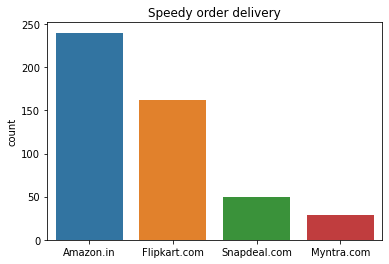

Weightage in percentage
 Amazon.in       38.945578
Flipkart.com    23.129252
Myntra.com      18.877551
Snapdeal        14.795918
Paytm.com        4.251701
dtype: float64


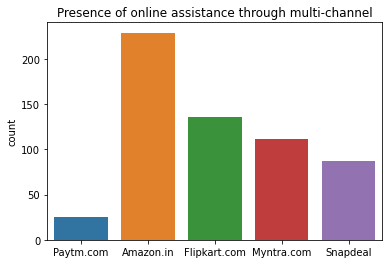

Weightage in percentage
 Amazon.in       45.959596
Flipkart.com    29.545455
Paytm.com       14.646465
Snapdeal.com     6.313131
Myntra.com       3.535354
dtype: float64


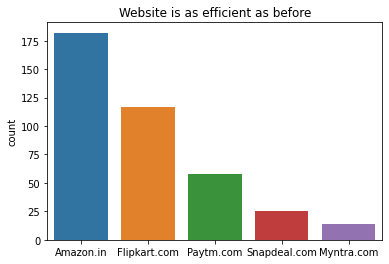

In [79]:
counts = 0
plot_dict = {}
for cname in SQ_df.iloc[:,3:].columns:
    counts += 1
    plot_list = []
    for i in SQ_df[cname]:
        for j in i.split(','):
            plot_list.append(j.lstrip())
    plot_dict[str(counts)] = plot_list
    
    
    print('Weightage in percentage\n',pd.Series(plot_dict[str(counts)]).value_counts(normalize=True)*100)
    sns.countplot(plot_dict[str(counts)])
    plt.title(cname)
#     plt.tick_params(axis='x', rotation=45)
    plt.show()

# 2) System Quality

In [25]:
UI_Q_df = pd.DataFrame({})

for i in [data for data in new_questionaire[new_questionaire['Code'] == 'UI Q'].Questions]:
    UI_Q_df[i] =  data[i]

In [26]:
UI_Q_df.iloc[:,:6].describe()

,18 The content on the website must be easy to read and understand,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,36 User derive satisfaction while shopping on a good quality website or application
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,4.382900,4.286245,4.115242,4.394052,4.368030,4.591078
std,1.046603,1.059708,1.064045,1.162586,0.951364,0.649393
min,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Amazon.in       29.225352
Flipkart.com    23.591549
Myntra.com      17.253521
Snapdeal.com    15.258216
Paytm.com       14.671362
dtype: float64


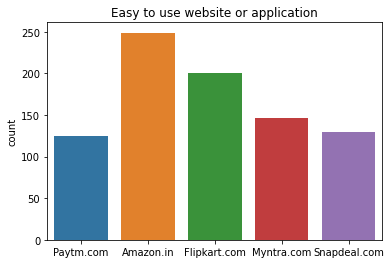

Amazon.in       35.193798
Flipkart.com    27.131783
Myntra.com      17.829457
Paytm.com       10.387597
Snapdeal.com     9.457364
dtype: float64


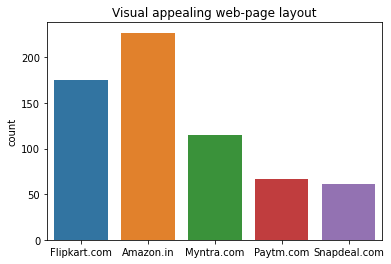

Amazon.in       37.443609
Flipkart.com    24.360902
Paytm.com       14.887218
Snapdeal.com    12.180451
Myntra.com      11.127820
dtype: float64


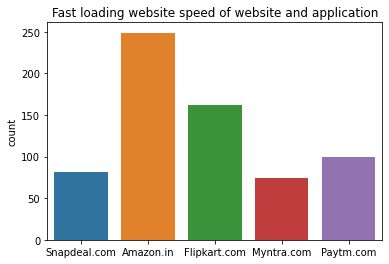

Amazon.in       39.273356
Flipkart.com    25.259516
Paytm.com       16.608997
Myntra.com      11.072664
Snapdeal.com     7.785467
dtype: float64


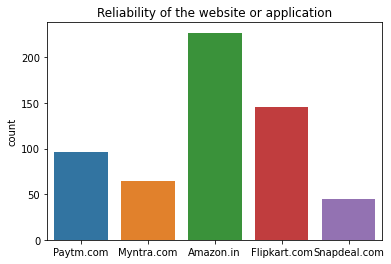

Amazon.com      36.564626
Flipkart.com    26.870748
Paytm.com       18.197279
Myntra.com      13.435374
Snapdeal         4.931973
dtype: float64


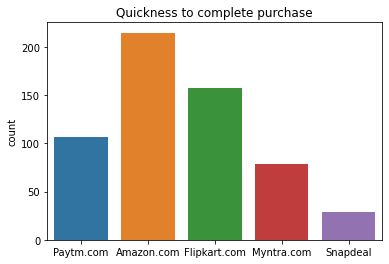

Amazon.in       29.778393
Flipkart.com    28.116343
Myntra.com      18.282548
Snapdeal.com    12.465374
Patym.com       11.357341
dtype: float64


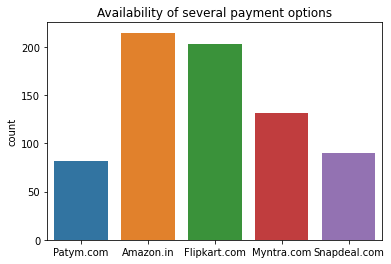

In [82]:
counts = 0
plot_dict = {}
for cname in UI_Q_df.iloc[:,6:].columns:
    counts += 1
    plot_list = []
    for i in UI_Q_df[cname]:
        for j in i.split(','):
            plot_list.append(j.lstrip())
    plot_dict[str(counts)] = plot_list
    
    print(pd.Series(plot_dict[str(counts)]).value_counts(normalize=True)*100)
    sns.countplot(plot_dict[str(counts)])
    plt.title(cname)
#     plt.tick_params(axis='x', rotation=45)
    plt.show()

In [28]:
4.591078

4.591078

# 3) Product Information

In [29]:
PI_df = pd.DataFrame({})

for i in [data for data in new_questionaire[new_questionaire['Code'] == 'PI'].Questions]:
    PI_df[i] =  data[i]

In [30]:
PI_df.iloc[:,:6].describe()

,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,35 Displaying quality Information on the website improves satisfaction of customers,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,4.137546,3.873606,4.107807,4.286245,4.148699,4.349442
std,0.918123,1.068027,1.082206,0.789292,0.842110,0.755953
min,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000
25%,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Amazon.in       38.762215
Flipkart.com    31.596091
Myntra.com      10.423453
Snapdeal.com     9.609121
Paytm.com        9.609121
dtype: float64


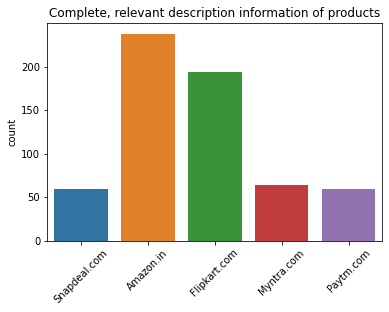

In [31]:
counts = 0
plot_dict = {}
for cname in PI_df.iloc[:,6:].columns:
    counts += 1
    plot_list = []
    for i in PI_df[cname]:
        for j in i.split(','):
            plot_list.append(j.lstrip())
    plot_dict[str(counts)] = plot_list
    
    print(pd.Series(plot_dict[str(counts)]).value_counts(normalize=True)*100)
    sns.countplot(plot_dict[str(counts)])
    plt.title(cname)
    plt.tick_params(axis='x', rotation=45)
    plt.show()

In [32]:
4.349442

4.349442

# 4) Trust

In [33]:
T_df = pd.DataFrame({})

for i in [data for data in new_questionaire[new_questionaire['Code'] == 'T'].Questions]:
    T_df[i] =  data[i]

In [34]:
T_df.iloc[:,:3].mean()

26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time    4.256506
28 Being able to guarantee the privacy of the customer                                                   4.591078
38 User satisfaction cannot exist without trust                                                          4.182156
dtype: float64

Average shows that the User's privacy matters in-order to build Trust

Amazon.in       40.827338
Flipkart.com    25.719424
Myntra.com      15.827338
Snapdeal.com    13.309353
Paytm.com        4.316547
dtype: float64


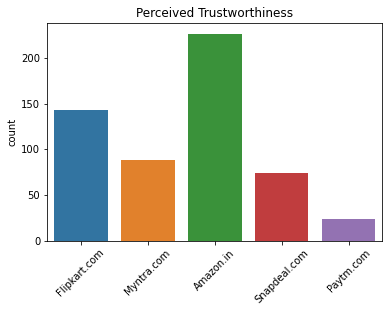

Amazon.in       39.323843
Flipkart.com    26.690391
Myntra.com      13.879004
Paytm.com       12.099644
Snapdeal.com     8.007117
dtype: float64


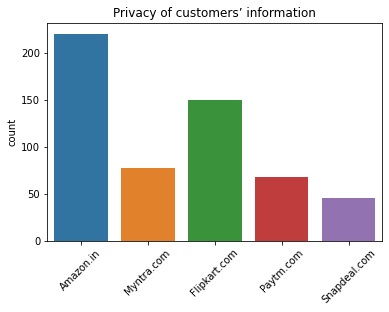

Amazon.in       32.492114
Flipkart.com    23.501577
Snapdeal.com    15.772871
Myntra.com      14.353312
Paytm.com       13.880126
dtype: float64


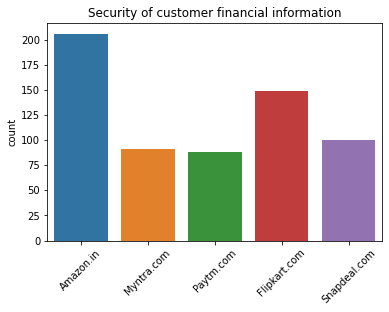

In [35]:
counts = 0
plot_dict = {}
for cname in T_df.iloc[:,3:].columns:
    counts += 1
    plot_list = []
    for i in T_df[cname]:
        for j in i.split(','):
            plot_list.append(j.lstrip())
    plot_dict[str(counts)] = plot_list
    
    print(pd.Series(plot_dict[str(counts)]).value_counts(normalize=True)*100)
    sns.countplot(plot_dict[str(counts)])
    plt.title(cname)
    plt.tick_params(axis='x', rotation=45)
    plt.show()

The Data shows that the Amazon is the most trusted e-commerce site among other e-stores due to </br>**Privacy of User's Information** </br>**Security of Financial Information**

# 5) Net Benefit

In [37]:
NB_df = pd.DataFrame({})

for i in [data for data in new_questionaire[new_questionaire['Code'] == 'NB'].Questions]:
    NB_df[i] =  data[i]

In [38]:
NB_df.iloc[:,:5].mean()

30 Online shopping gives monetary benefit and discounts                       3.921933
34 Gaining access to loyalty programs is a benefit of shopping online         3.955390
37 Net Benefit derived from shopping online can lead to users satisfaction    4.379182
41 Monetary savings                                                           4.263941
47 Getting value for money spent                                              4.163569
dtype: float64

Amazon.in       43.824701
Flipkart.com    36.653386
Myntra.com      12.749004
Paytm.com        3.984064
Snapdeal.com     2.788845
dtype: float64


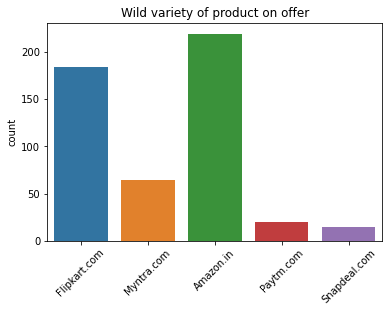

In [39]:
counts = 0
plot_dict = {}
for cname in NB_df.iloc[:,5:].columns:
    counts += 1
    plot_list = []
    for i in NB_df[cname]:
        for j in i.split(','):
            plot_list.append(j.lstrip())
    plot_dict[str(counts)] = plot_list
    
    print(pd.Series(plot_dict[str(counts)]).value_counts(normalize=True)*100)
    sns.countplot(plot_dict[str(counts)])
    plt.title(cname)
    plt.tick_params(axis='x', rotation=45)
    plt.show()

5th factor **Net Benifit's** data shows that the **Amazon.in** offers the wide variety of products on offer and the **Flipkart** is slighty less. However, the difference is huge as compared to the other e-commerce stores.

 Amazon was climbed all the bars and tool the first position 

These 5 Factors lead customer towards **Utilitarian**(value recieved based on the task-related) or **Hedonic**(Fun and playfull Experience).

# Utilitarian value
**Utilitarian value is defined as that value that a customer receives based on a task-related and rational consumption behavior** 


In [40]:
UV_df = pd.DataFrame({})

for i in [data for data in new_questionaire[new_questionaire['Code'] == 'utilitarian'].Questions]:
    UV_df[i] =  data[i]

In [41]:
UV_df.describe()

,32 Shopping online is convenient and flexible,46 Shopping on the website helps you fulfill certain roles
count,269.000000,269.000000
mean,4.330855,3.282528
std,0.858569,1.178995
min,2.000000,1.000000
25%,4.000000,3.000000
50%,5.000000,3.000000
75%,5.000000,4.000000
max,5.000000,5.000000


Bases on Utilitarian Value:</br>Average rating shows that the users greatly focus upon what is convenient and flexible for them use rather than just focusing on fulfilling certain roles.

# Hedonic value
**Hedonic value is defined as that value a customer receives based on the subject experience of fun and playfulness**

In [42]:
HV_df = pd.DataFrame({})

for i in [data for data in new_questionaire[new_questionaire['Code'] == 'hedonic'].Questions]:
    HV_df[i] =  data[i]

In [43]:
HV_df.describe()

,31 Enjoyment is derived from shopping online,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer
count,269.000000,269.000000,269.000000,269.000000
mean,3.565056,3.553903,3.223048,3.501859
std,1.304572,1.065869,1.219581,1.141564
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,3.000000,3.000000
75%,5.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


Hedonic related columns shows that the users care slightly less about the playfullness experience.

# Complaints

In [44]:
issues_df = pd.DataFrame({})

for i in [data for data in new_questionaire[new_questionaire['Code'] == 'issue'].Questions]:
    issues_df[i] =  data[i]

Amazon.in       32.374101
Flipkart.com    24.700240
Paytm.com       18.465228
Snapdeal.com    16.067146
Myntra.com       8.393285
dtype: float64


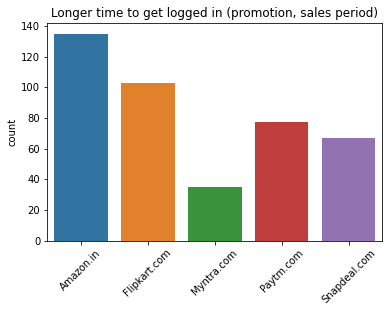

Amazon.in       30.434783
Flipkart.com    22.705314
Snapdeal.com    22.222222
Myntra.com      17.874396
Paytm.com        6.763285
dtype: float64


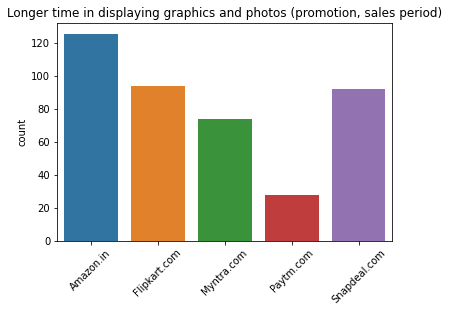

Myntra.com      25.510204
Paytm.com       24.489796
Amazon.in       19.047619
snapdeal.com    16.326531
Flipkart.com    14.625850
dtype: float64


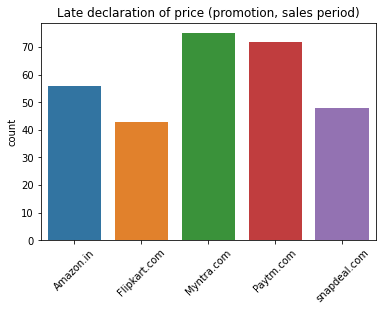

Paytm.com       26.553672
Myntra.com      19.209040
Amazon.in       19.209040
Snapdeal.com    17.796610
Flipkart.com    17.231638
dtype: float64


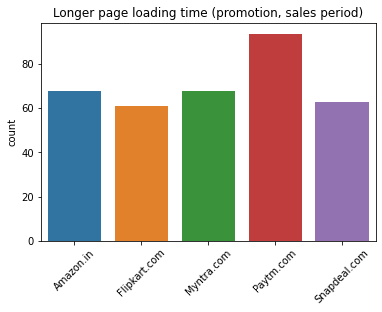

Snapdeal.com    32.732733
Amazon.in       31.231231
Flipkart.com    18.018018
Paytm.com       15.915916
Myntra.com       2.102102
dtype: float64


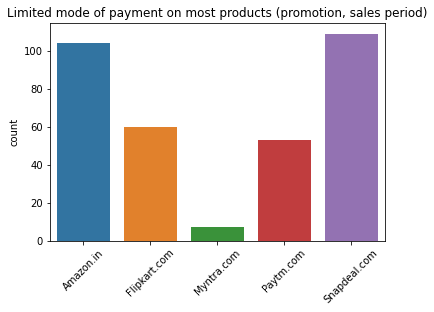

Paytm.com       33.220339
Snapdeal.com    30.508475
Flipkart.com    14.915254
Amazon.in       12.542373
Myntra.com       8.813559
dtype: float64


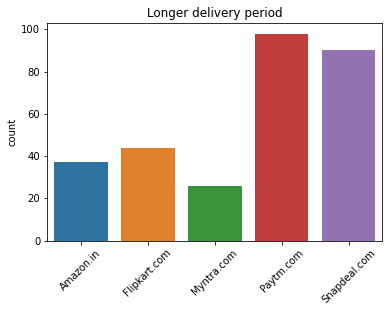

Amazon.in       43.925234
Flipkart.com    22.429907
Paytm.com       19.626168
Myntra.com      11.526480
Snapdeal.com     2.492212
dtype: float64


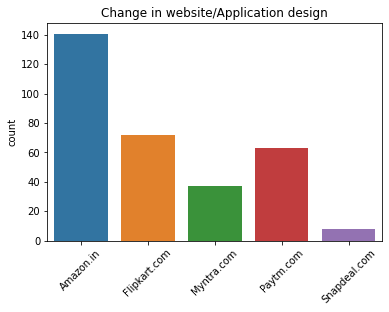

Amazon.in       24.451411
Snapdeal.com    23.197492
Myntra.com      20.689655
Flipkart.com    19.435737
Paytm.com       12.225705
dtype: float64


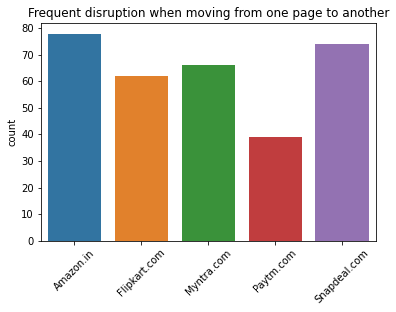

In [45]:
counts = 0
plot_dict = {}
for cname in issues_df.iloc[:,:].columns:
    counts += 1
    plot_list = []
    for i in issues_df[cname]:
        for j in i.split(','):
            plot_list.append(j.lstrip())
    plot_dict[str(counts)] = plot_list
    
    print(pd.Series(plot_dict[str(counts)]).value_counts(normalize=True)*100)
    sns.countplot( pd.Series( plot_dict[str(counts)]).sort_values() )
    plt.title(cname)
    plt.tick_params(axis='x', rotation=45)
    plt.show()

We can clearly see that the most of the customers are facing the issues with Amazon e-commerce site like: **</br>Longer Time in Displaying Content </br>Limited mode of payments </br>Frequent disruptions while navigating**

Still customers recommend Amazon to their friends.
Five Factors effect customers Decision while choosing and suggesting online stores.

**To fix these issues, online stores must focus on these 5 Factors and make changes accordingly.**

Amazon.in       43.925234
Flipkart.com    22.429907
Paytm.com       19.626168
Myntra.com      11.526480
Snapdeal.com     2.492212
dtype: float64


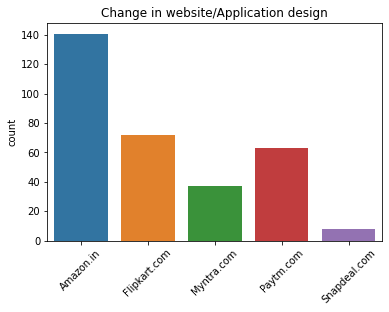

In [67]:
counts = 0
plot_dict = {}
for cname in issues_df.iloc[:,-2:-1].columns:
    counts += 1
    plot_list = []
    for i in issues_df[cname]:
        for j in i.split(','):
            plot_list.append(j.lstrip())
    plot_dict[str(counts)] = plot_list
    
    print(pd.Series(plot_dict[str(counts)]).value_counts(normalize=True)*100)
    sns.countplot( pd.Series( plot_dict[str(counts)]).sort_values() )
    plt.title(cname)
    plt.tick_params(axis='x', rotation=45)
    plt.show()

Amazon is changing thier Website frequently

# Decision Making

In [53]:
DM_df = pd.DataFrame({})

for i in [data for data in new_questionaire[new_questionaire['Code'] == 'DM'].Questions]:
    DM_df[i] =  data_sheet[i]
    

more than 15 mins    45.724907
6-10 mins            26.394052
11-15 mins           17.100372
Less than 1 min       5.576208
1-5 mins              5.204461
dtype: float64


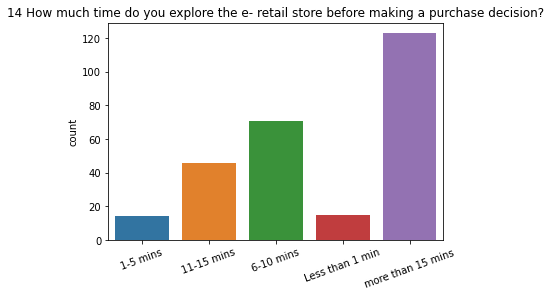

Credit/Debit cards        47.133758
Cash on delivery (CoD)    24.203822
E-wallets (Paytm          14.331210
Freecharge etc.)          14.331210
dtype: float64


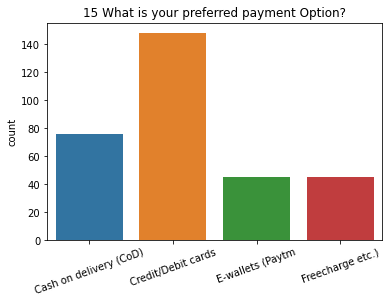

Sometimes          63.568773
Never              17.843866
Frequently         13.011152
Very frequently     5.576208
dtype: float64


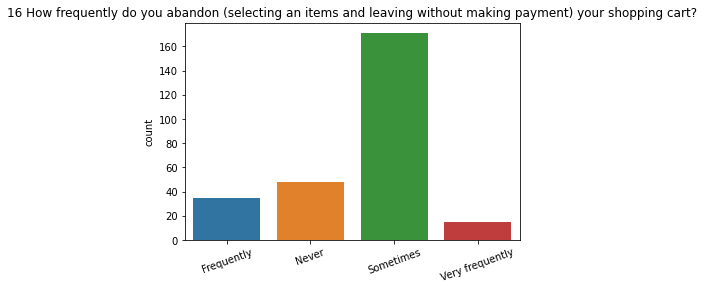

Better alternative offer        49.442379
Promo code not applicable       20.074349
Change in price                 13.754647
Lack of trust                   11.524164
No preferred mode of payment     5.204461
dtype: float64


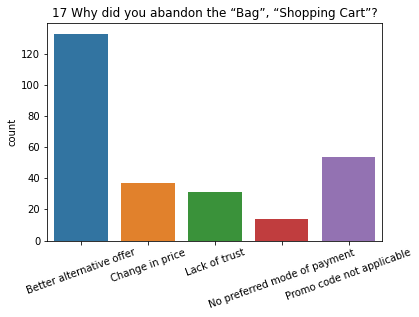

Amazon.in       45.911950
Flipkart.com    26.624738
Myntra.com      15.932914
Paytm.com        9.224319
snapdeal.com     2.306080
dtype: float64


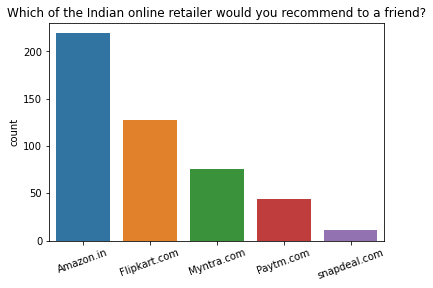

In [54]:
counts = 0
plot_dict = {}
for cname in DM_df.iloc[:,:].columns:
    counts += 1
    plot_list = []
    for i in DM_df[cname]:
        for j in i.split(','):
            plot_list.append(j.lstrip())
    plot_dict[str(counts)] = plot_list
    
    print(pd.Series(plot_dict[str(counts)]).value_counts(normalize=True)*100)
    sns.countplot( pd.Series( plot_dict[str(counts)]).sort_values() )
    plt.title(cname)
    plt.tick_params(axis='x', rotation=20)
    plt.show()

In [52]:
pd.Series(plot_dict['5']).value_counts()

Amazon.in       219
Flipkart.com    127
Myntra.com       76
Paytm.com        44
snapdeal.com     11
dtype: int64

##### 

In Decision making we can see that the most recommended Web site is AMAZON! But Why?

Analysis about these Websites with respect to the five factors:</br>
**1)System Quality : Amazon </br>
2)Information quality : Amazon</br>
3)Product Information : Amazon</br>
4)Trust : Amazon</br>
5)Net benefit : Amazon</br>**